# Official Efficiency Plots for 2017 and 2018

Dedicated notebook to produce all efficiency plots (2017 and 2018) to ringer note/paper.

In [34]:
from core import GetHistogramRootPaths, GetHistogramFromMany, GetProfile
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle
from Gaugi import mkdir_p
import rootplotlib as rpl
from prettytable import PrettyTable
rpl.set_atlas_style()
rpl.suppress_root_warnings()

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2


Applying ATLAS style settings...
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1) Read all files:

### 1.1) Create keys and paths

In [2]:
triggers = [
            'HLT_e28_lhtight_nod0_ivarloose',
            'HLT_e28_lhtight_nod0_noringer_ivarloose',
            'HLT_e17_lhvloose_nod0_L1EM15VHI',
            'HLT_e26_lhtight_nod0_ivarloose',
            'HLT_e60_lhmedium_nod0',
            'HLT_e140_lhloose_nod0',
            ]
paths, keys =  GetHistogramRootPaths( triggers, removeInnefBefore=False, is_emulation=False)

Making paths...: 100%|██████████| 6/6 [00:00<00:00, 19584.30it/s]


### 1.2) Read 2017 data:

In [3]:
path = '/home/jodafons/public/cern_data/data17_13TeV/Mon/EGAM1/before_ts1'
h_data17_before_ts1 = GetHistogramFromMany(path, paths, keys)

Loading: 100%|██████████| 188/188 [00:28<00:00,  6.49it/s]


In [4]:
path = '/home/jodafons/public/cern_data/data17_13TeV/Mon/EGAM1/after_ts1'
h_data17_after_ts1 = GetHistogramFromMany(path, paths, keys)

Loading: 100%|██████████| 1472/1472 [03:34<00:00,  6.86it/s]


In [5]:
path = '/home/jodafons/public/cern_data/data17_13TeV/Mon/EGAM7/before_ts1/user.*'
h_data17_before_ts1_egam7 = GetHistogramFromMany(path, paths, keys)

Loading: 100%|██████████| 172/172 [00:30<00:00,  5.69it/s]


In [6]:
path = '/home/jodafons/public/cern_data/data17_13TeV/Mon/EGAM7/after_ts1'
h_data17_after_ts1_egam7 = GetHistogramFromMany(path, paths, keys)

Loading: 100%|██████████| 1373/1373 [03:45<00:00,  6.10it/s]


### 1.3) Read 2018 data:

In [7]:
path = '/home/jodafons/public/cern_data/data18_13TeV/Mon/EGAM1_merged/user.*'
h_data18 = GetHistogramFromMany(path, paths, keys)

Loading: 100%|██████████| 10/10 [01:59<00:00, 11.90s/it]


In [8]:
path = '/home/jodafons/public/cern_data/data18_13TeV/Mon/EGAM7/user.*'
h_data18_egam7 = GetHistogramFromMany(path, paths, keys)

Loading: 100%|██████████| 513/513 [01:18<00:00,  6.54it/s]


## 2) Official plots (e28 ringer vs noringer 2017, after TS1):

Compare ringer and noringer (backup triggers) chains.

In [9]:
def add_legend(x, y, legends):
    rpl.add_legend( legends,x,y,x+0.98,y+0.20,textsize=18, option='p' )

In [12]:
mkdir_p('output')

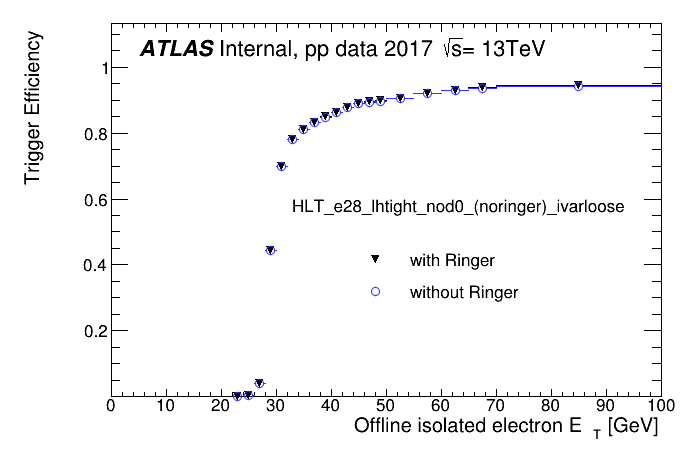

In [13]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_match_et'],
                               h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_et']),
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_et'],
                               h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_et']),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35,['with Ringer', 'without Ringer'] )
rpl.add_text( 0.42, 0.55, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig('output/eff_EGAM1_e28_ringer_and_noringer_2017_after_ts1_HLT_et.pdf')

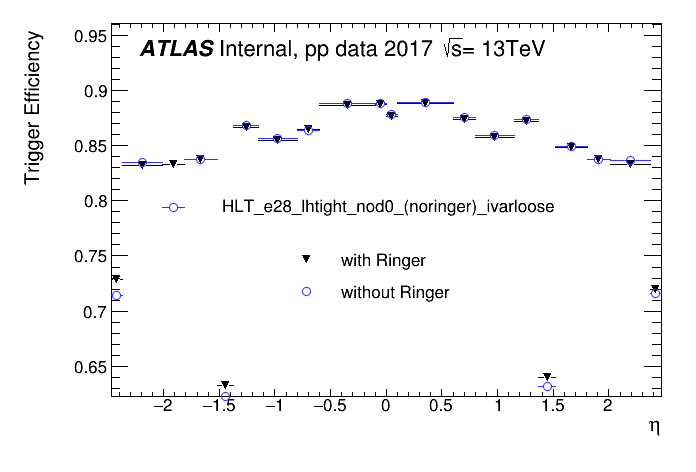

In [14]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_match_eta'],
                               h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_eta']),
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_eta'],
                               h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_eta']),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.35,['with Ringer', 'without Ringer'] )
rpl.add_text( 0.32, 0.55, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.08) 
fig.show()
fig.savefig('output/eff_EGAM1_e28_ringer_and_noringer_2017_after_ts1_HLT_eta.pdf')

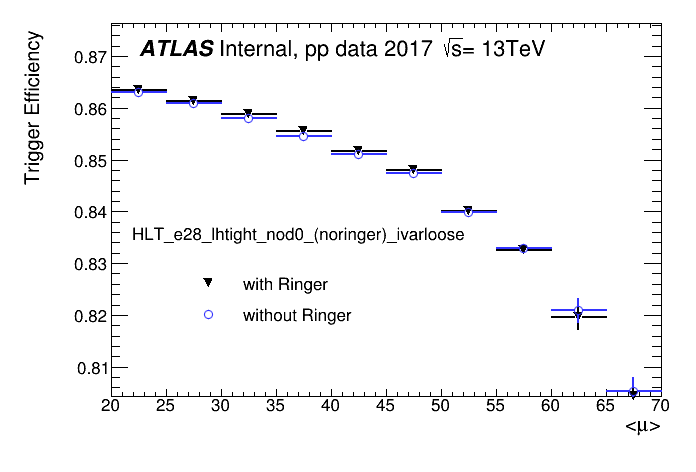

In [15]:
colors = [kBlack,kBlue-4]
markers = [23, 24]

hists = [
            h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_match_mu'],
            h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_mu'],
            h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_mu'],
            h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_mu'],
]
hists = [ rpl.hist1d.rebin( h , 10, 20, 70 ) for h in hists ]

hists = [ rpl.hist1d.divide( hists[0], hists[1] ), rpl.hist1d.divide(hists[2], hists[3]) ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.25,0.3,['with Ringer', 'without Ringer'] )
rpl.add_text( 0.19, 0.49, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.015) 
fig.show()
fig.savefig('output/eff_EGAM1_e28_ringer_and_noringer_2017_after_ts1_HLT_mu.pdf')

### 2.1) Check fake rejection for FastCalo step:

**NOTE**: For Run-2, to get the fast-calo boolean, point the histogram to L2

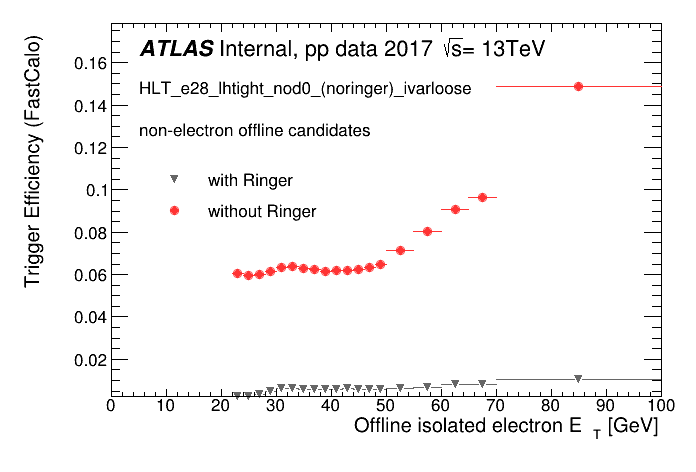

In [16]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            rpl.hist1d.divide(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_match_et'],
                              h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_et']),
            rpl.hist1d.divide(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_L2_match_et'],
                              h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_L2_et']),
]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.2, 0.52, ['with Ringer', 'without Ringer'] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2 )
fig.show()
fig.savefig('output/eff_EGAM7_e28_ringer_and_noringer_2017_after_ts1_L2Calo_et.pdf')

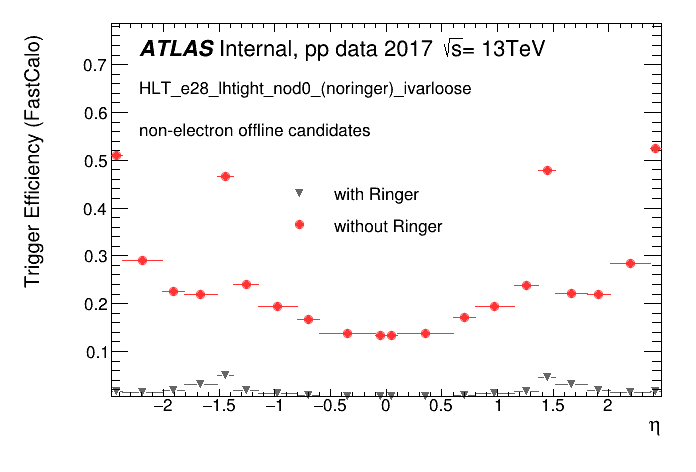

In [17]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            rpl.hist1d.divide(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_match_eta'],
                              h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_eta']),
            rpl.hist1d.divide(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_L2_match_eta'],
                              h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_L2_eta']),
]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.38, 0.49, ['with Ringer', 'without Ringer'] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.5 )
fig.show()
fig.savefig('output/eff_EGAM7_e28_ringer_and_noringer_2017_after_ts1_L2Calo_eta.pdf')

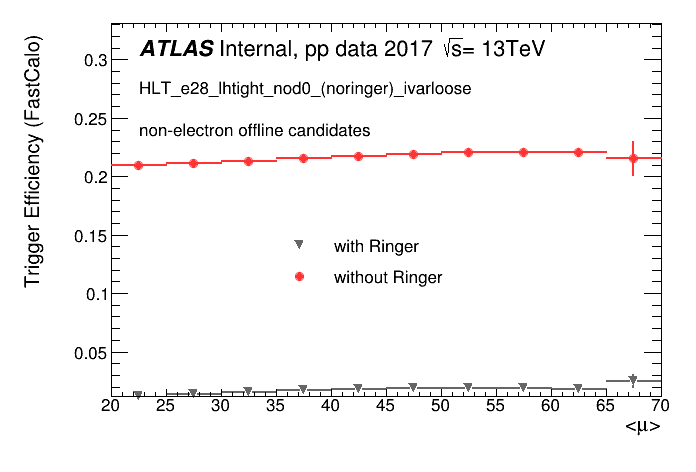

In [18]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_match_mu'],
            h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_mu'],
            h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_L2_match_mu'],
            h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_L2_mu'],
        ]

hists = [ rpl.hist1d.rebin( h , 10, 20, 70 ) for h in hists ]
hists = [ rpl.hist1d.divide( hists[0], hists[1] ), rpl.hist1d.divide(hists[2], hists[3]) ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.38, 0.38, ['with Ringer', 'without Ringer'] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.5 )
fig.show()
fig.savefig('output/eff_EGAM7_e28_ringer_and_noringer_2017_after_ts1_L2Calo_mu.pdf')

### 2.2) Check fake rejection for HLT step:



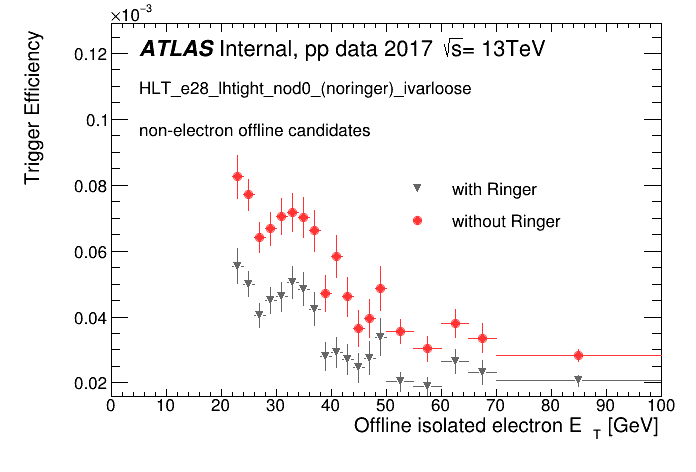

In [19]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            rpl.hist1d.divide(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_HLT_match_et'],
                              h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_HLT_et']),
            rpl.hist1d.divide(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_et'],
                              h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_et']),
]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.55, 0.5, ['with Ringer', 'without Ringer'] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=False , ymaxf=1.45 )
fig.show()
fig.savefig('output/eff_EGAM7_e28_ringer_and_noringer_2017_after_ts1_et.pdf')

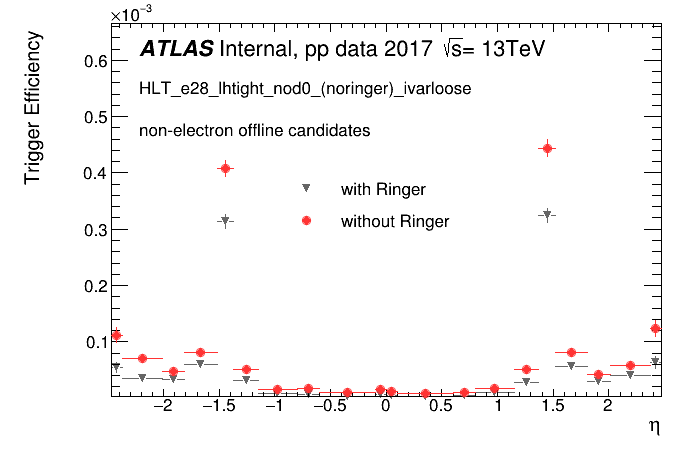

In [20]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            rpl.hist1d.divide(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_HLT_match_eta'],
                              h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_HLT_eta']),
            rpl.hist1d.divide(h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_eta'],
                              h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_eta']),
]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.39, 0.5, ['with Ringer', 'without Ringer'] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=False , ymaxf=1.45 )
fig.show()
fig.savefig('output/eff_EGAM7_e28_ringer_and_noringer_2017_after_ts1_eta.pdf')

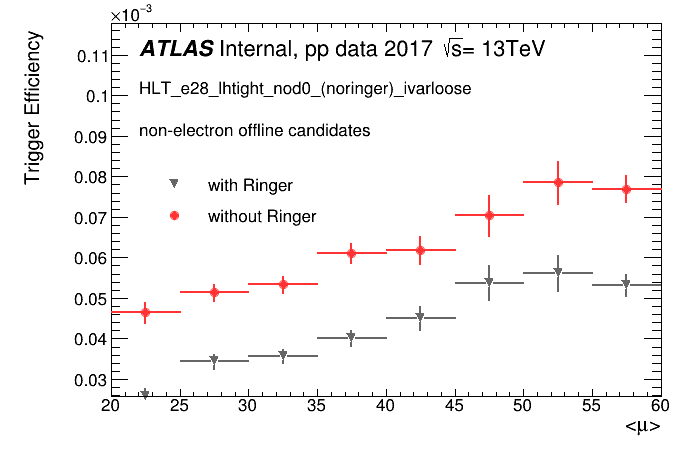

In [21]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_HLT_match_mu'],
            h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_HLT_mu'],
            h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_mu'],
            h_data17_after_ts1_egam7['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_mu'],
        ]

hists = [ rpl.hist1d.rebin( h , 8, 20, 60 ) for h in hists ]
hists = [ rpl.hist1d.divide( hists[0], hists[1] ), rpl.hist1d.divide(hists[2], hists[3]) ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.2, 0.51, ['with Ringer', 'without Ringer'] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.5 )
fig.show()
fig.savefig('output/eff_EGAM7_e28_ringer_and_noringer_2017_after_ts1_HLT_mu.pdf')

## 3) Official plots (2017 ringer vs noringer before and after TS1)

This section will plot all single triggers before and after ts1.
- oper markers: before TS1 (without ringer);
- close markers: after TS1 (with ringer)


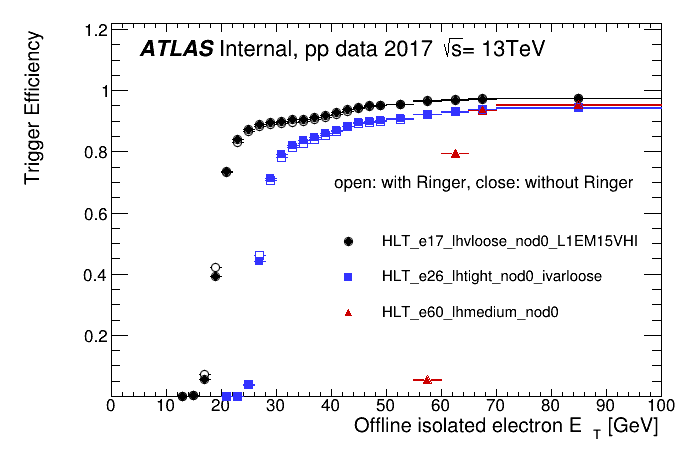

In [22]:
colors = [kBlack,kBlue-4,kRed+1, kBlack,kBlue-4,kRed+1]
markers = [20,21,22, 24,25,26]
hists = [
            rpl.hist1d.divide( h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_et'],
                               h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_et']),
            rpl.hist1d.divide( h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_et'],
                               h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_et']),
            rpl.hist1d.divide( h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_match_et'],
                               h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_et']),
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_et'],
                               h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_et']),
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_et'],
                               h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_et']),
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_match_et'],
                               h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_et']),
        ]
                              
fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text( 0.48, 0.6, 'open: with Ringer, close: without Ringer', textsize=0.04)
legends = ['HLT_e17_lhvloose_nod0_L1EM15VHI','HLT_e26_lhtight_nod0_ivarloose','HLT_e60_lhmedium_nod0']
rpl.add_legend( legends, 0.45,0.3,.98,0.6,textsize=16,option = 'p' )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.25 )
fig.show()
fig.savefig('output/eff_EGAM1_e17_e26_e60_2017_before_and_after_ts1_et.pdf')

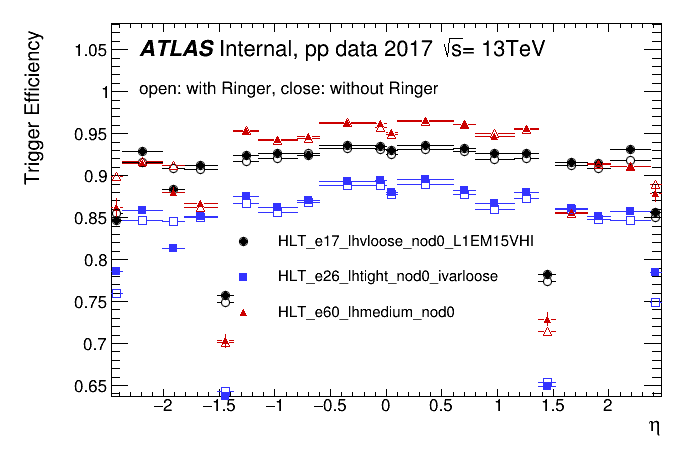

In [23]:
colors = [kBlack,kBlue-4,kRed+1, kBlack,kBlue-4,kRed+1]
markers = [20,21,22, 24,25,26]
hists = [
            rpl.hist1d.divide( h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_eta'],
                               h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_eta']),
            rpl.hist1d.divide( h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_eta'],
                               h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_eta']),
            rpl.hist1d.divide( h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_match_eta'],
                               h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_eta']),
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_eta'],
                               h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_eta']),
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_eta'],
                               h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_eta']),
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_match_eta'],
                               h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_eta']),
        ]
                              
fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text( 0.2, 0.8, 'open: with Ringer, close: without Ringer', textsize=0.04)
legends = ['HLT_e17_lhvloose_nod0_L1EM15VHI','HLT_e26_lhtight_nod0_ivarloose','HLT_e60_lhmedium_nod0']
rpl.add_legend( legends, 0.3,0.3,.83,0.6,textsize=16,option = 'p' )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.12 )
fig.show()
fig.savefig('output/eff_EGAM1_e17_e26_e60_2017_before_and_after_ts1_eta.pdf')

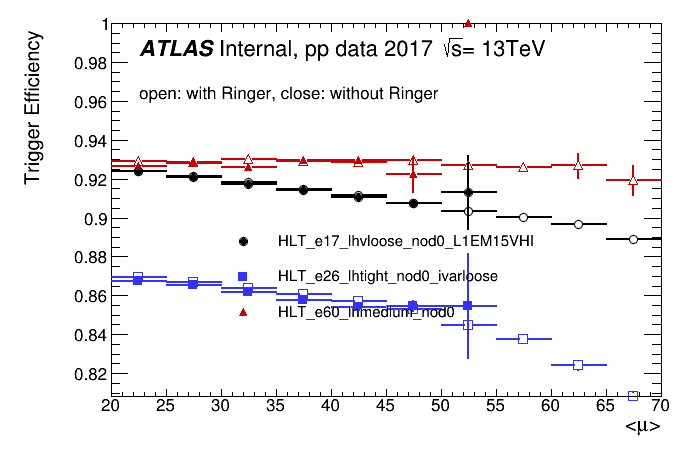

In [24]:
resize =  [10,20,70]
colors = [kBlack,kBlue-4,kRed+1, kBlack,kBlue-4,kRed+1]
markers = [20,21,22, 24,25,26]
hists = [
            h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_mu'],
            h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_mu'],
            h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_mu'],
            h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_mu'],
            h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_match_mu'],
            h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_mu'],
            h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_mu'],
            h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_mu'],
            h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_mu'],
            h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_mu'],
            h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_match_mu'],
            h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_mu'],
        ]

hists = [ rpl.hist1d.rebin( h , 10, 20, 70 ) for h in hists ]
hists = [ rpl.hist1d.divide( hists[0] , hists[1] ), 
          rpl.hist1d.divide( hists[2] , hists[3] ),
          rpl.hist1d.divide( hists[4] , hists[5] ),
          rpl.hist1d.divide( hists[6] , hists[7] ),
          rpl.hist1d.divide( hists[8] , hists[9] ),
          rpl.hist1d.divide( hists[10], hists[11]),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text( 0.2, 0.79, 'open: with Ringer, close: without Ringer', textsize=0.04)
legends = ['HLT_e17_lhvloose_nod0_L1EM15VHI','HLT_e26_lhtight_nod0_ivarloose','HLT_e60_lhmedium_nod0']
rpl.add_legend( legends, 0.3,0.3,.83,0.6,textsize=16,option = 'p' )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.0 )
fig.show()
fig.savefig('output/eff_EGAM1_e17_e26_e60_2017_before_and_after_ts1_mu.pdf')

## 4) Official plots (2017 (after TS1) and 2018 ringer vs noringer)

Here we will plot the comparison between ringer (v6), operating in 2017 after TS1, and ringer v8 (2018 tunings)

- 2017 after TS1: ringer v6 tunings;
- 2018: ringer v8 tunings;

### 4.1) HLT_e17_lhvloose_nod0_L1EM15VHI:

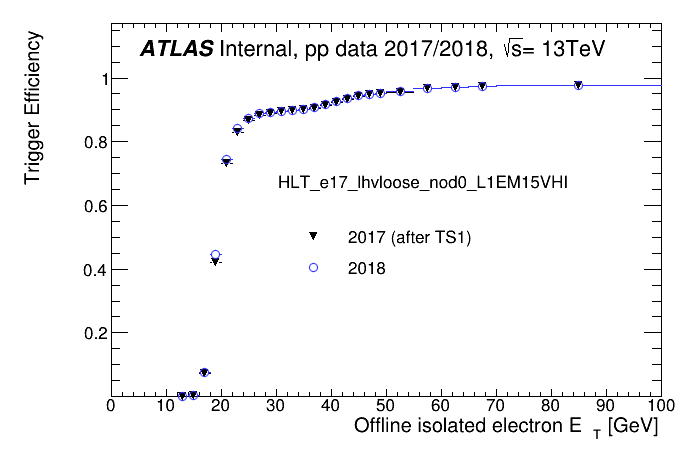

In [25]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_et'],
                               h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_et']),
            rpl.hist1d.divide( h_data18['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_et'],
                               h_data18['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_et']),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]' , colors, markers )
rpl.set_atlas_label(0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
rpl.add_text( 0.4, 0.60, 'HLT_e17_lhvloose_nod0_L1EM15VHI', textsize=0.04)
add_legend( 0.4, 0.4, ['2017 (after TS1)', '2018'])
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2 )
fig.show()
fig.savefig('output/eff_EGAM1_e17_lhvloose_nod0_L1EM15VHI_2017_after_ts1_and_2018_et.pdf')

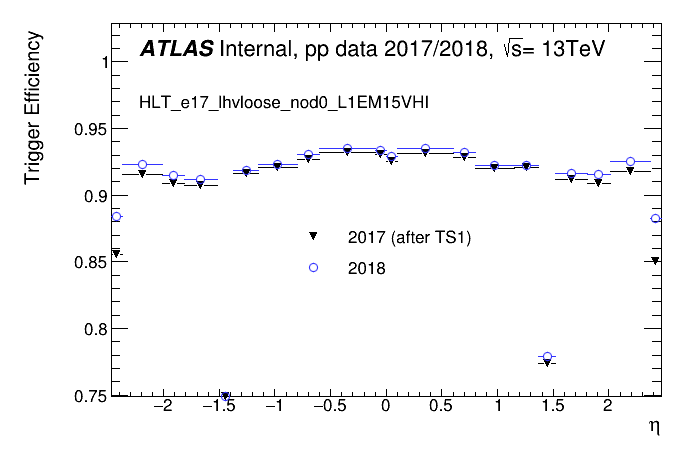

In [26]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_eta'],
                               h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_eta']),
            rpl.hist1d.divide( h_data18['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_eta'],
                               h_data18['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_eta']),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
add_legend( 0.4, 0.4, ['2017 (after TS1)', '2018'])
rpl.add_text( 0.2, 0.77, 'HLT_e17_lhvloose_nod0_L1EM15VHI', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1 )
fig.show()
fig.savefig('output/eff_EGAM1_e17_lhvloose_nod0_L1EM15VHI_2017_after_ts1_and_2018_eta.pdf')

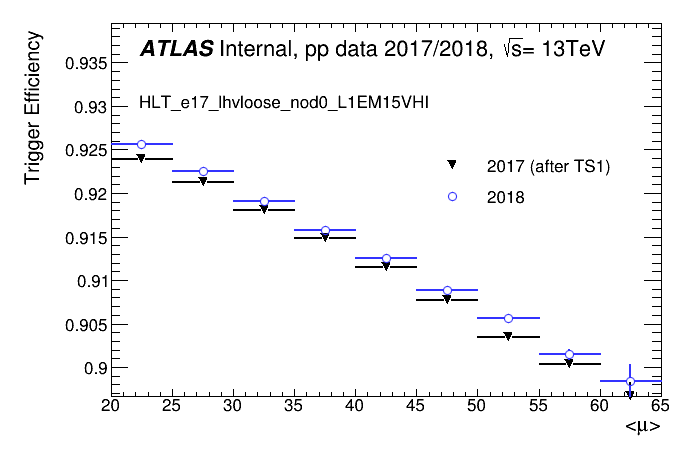

In [27]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_mu'],
            h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_mu'],
            h_data18['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_mu'],
            h_data18['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_mu'],
        ]

hists = [ rpl.hist1d.rebin( h , 9, 20, 65 ) for h in hists ]
hists = [ rpl.hist1d.divide( hists[0] , hists[1] ), 
          rpl.hist1d.divide( hists[2] , hists[3] )]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
add_legend( 0.6, 0.55, ['2017 (after TS1)', '2018'])
rpl.add_text( 0.2, 0.77, 'HLT_e17_lhvloose_nod0_L1EM15VHI', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.015 )
fig.show()
fig.savefig('output/eff_EGAM1_e17_lhvloose_nod0_L1EM15VHI_2017_after_ts1_and_2018_mu.pdf')

### 4.2) HLT_e26_lhtight_nod0_ivarloose:

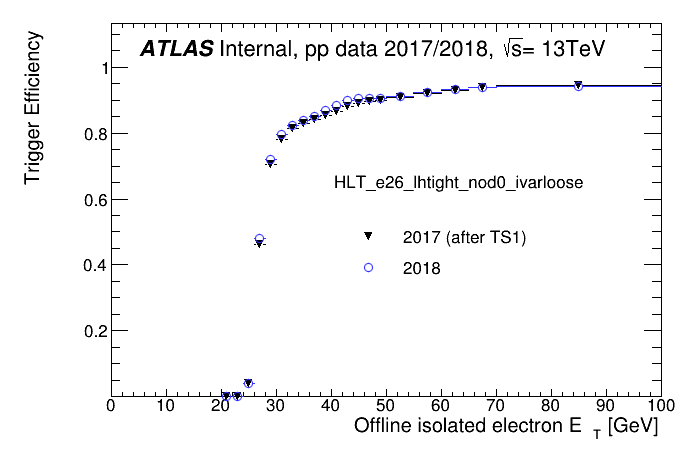

In [28]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_et'],
                               h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_et']),
            rpl.hist1d.divide( h_data18['HLT_e26_lhtight_nod0_ivarloose_HLT_match_et'],
                               h_data18['HLT_e26_lhtight_nod0_ivarloose_HLT_et']),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]' , colors, markers )
rpl.set_atlas_label(0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
rpl.add_text( 0.48, 0.60, 'HLT_e26_lhtight_nod0_ivarloose', textsize=0.04)
add_legend( 0.48, 0.4, ['2017 (after TS1)', '2018'])
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2 )
fig.show()
fig.savefig('output/eff_EGAM1_e26_lhtight_nod0_ivarloose_2017_after_ts1_and_2018_et.pdf')

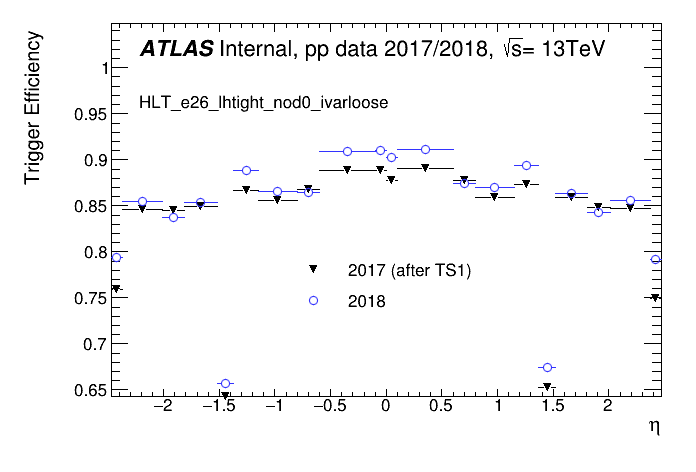

In [29]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_eta'],
                               h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_eta']),
            rpl.hist1d.divide( h_data18['HLT_e26_lhtight_nod0_ivarloose_HLT_match_eta'],
                               h_data18['HLT_e26_lhtight_nod0_ivarloose_HLT_eta']),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
add_legend( 0.4, 0.33, ['2017 (after TS1)', '2018'])
rpl.add_text( 0.2, 0.77, 'HLT_e26_lhtight_nod0_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.15 )
fig.show()
fig.savefig('output/eff_EGAM1_e26_lhtight_nod0_ivarloose_2017_after_ts1_and_2018_eta.pdf')

### 4.3) HLT_e60_lhmedium_nod0:

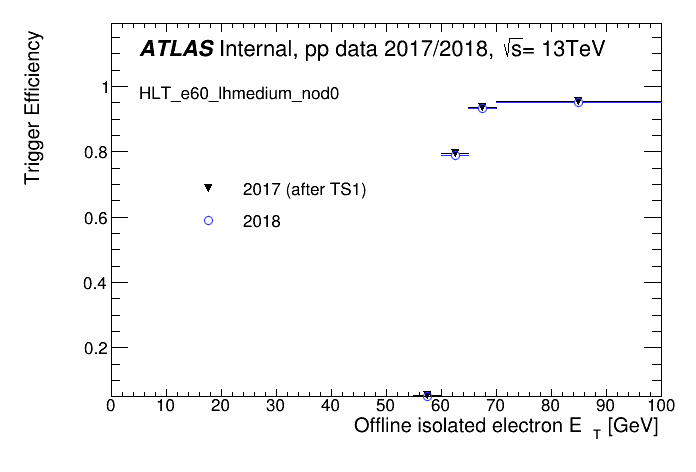

In [30]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_match_et'],
                               h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_et']),
            rpl.hist1d.divide( h_data18['HLT_e60_lhmedium_nod0_HLT_match_et'],
                               h_data18['HLT_e60_lhmedium_nod0_HLT_et']),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]' , colors, markers )
rpl.set_atlas_label(0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
rpl.add_text( 0.2, 0.79, 'HLT_e60_lhmedium_nod0', textsize=0.04)
add_legend( 0.25, 0.5, ['2017 (after TS1)', '2018'])
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.25 )
fig.show()
fig.savefig('output/eff_EGAM1_e60_lhmedium_nod0_2017_after_ts1_and_2018_et.pdf')

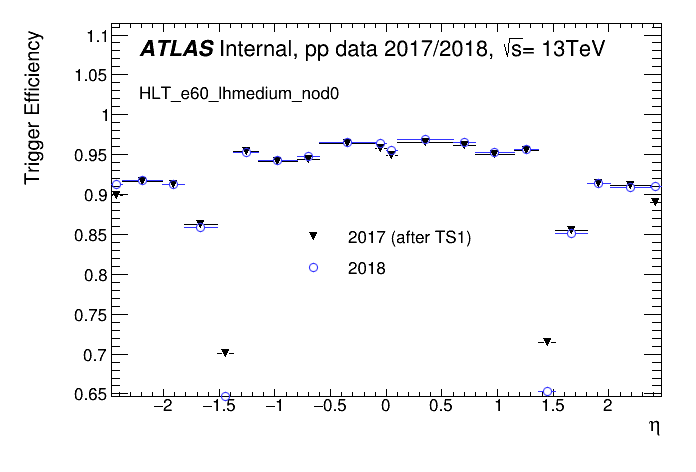

In [31]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_match_eta'],
                               h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_eta']),
            rpl.hist1d.divide( h_data18['HLT_e60_lhmedium_nod0_HLT_match_eta'],
                               h_data18['HLT_e60_lhmedium_nod0_HLT_eta']),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
add_legend( 0.4, 0.4, ['2017 (after TS1)', '2018'])
rpl.add_text( 0.2, 0.79, 'HLT_e60_lhmedium_nod0', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.15 )
fig.show()
fig.savefig('output/eff_EGAM1_e60_lhmedium_nod0_2017_after_ts1_and_2018_eta.pdf')

### 4.4) HLT_e140_lhloose_nod0:

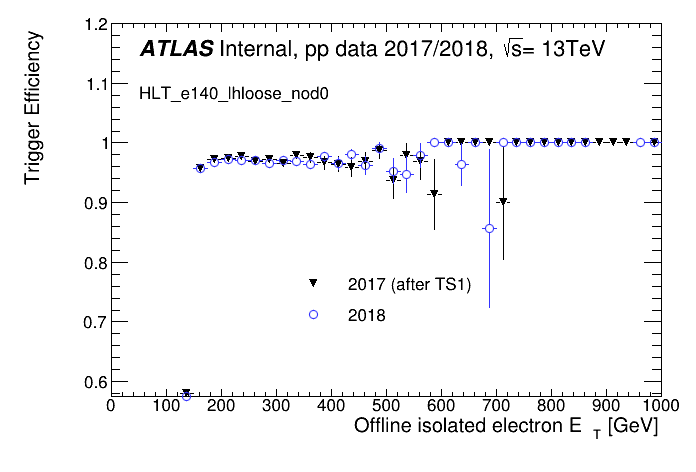

In [32]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e140_lhloose_nod0_HLT_match_et'],
                               h_data17_after_ts1['HLT_e140_lhloose_nod0_HLT_et']),
            rpl.hist1d.divide( h_data18['HLT_e140_lhloose_nod0_HLT_match_et'],
                               h_data18['HLT_e140_lhloose_nod0_HLT_et']),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]' , colors, markers )
rpl.set_atlas_label(0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
rpl.add_text( 0.2, 0.79, 'HLT_e140_lhloose_nod0', textsize=0.04)
add_legend( 0.4, 0.3, ['2017 (after TS1)', '2018'])
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2 )
fig.show()
fig.savefig('output/eff_EGAM1_e140_lhloose_nod0_2017_after_ts1_and_2018_et.pdf')

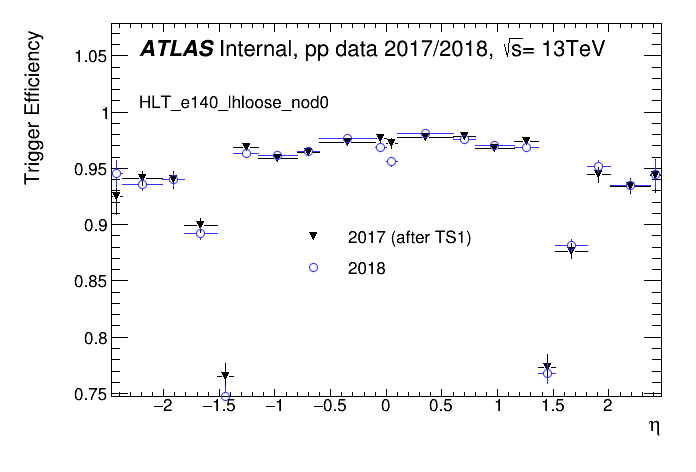

In [33]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            rpl.hist1d.divide( h_data17_after_ts1['HLT_e140_lhloose_nod0_HLT_match_eta'],
                               h_data17_after_ts1['HLT_e140_lhloose_nod0_HLT_eta']),
            rpl.hist1d.divide( h_data18['HLT_e140_lhloose_nod0_HLT_match_eta'],
                               h_data18['HLT_e140_lhloose_nod0_HLT_eta']),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2, 0.88, 'Internal, pp data 2017/2018, #sqrt{s}= 13TeV')
add_legend( 0.4, 0.4, ['2017 (after TS1)', '2018'])
rpl.add_text( 0.2, 0.77, 'HLT_e140_lhloose_nod0', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1 )
fig.show()
fig.savefig('output/eff_EGAM1_e140_lhloose_nod0_2017_after_ts1_and_2018_eta.pdf')

In [39]:
def make_table( data, trigger ):
    
    t = PrettyTable(['Level','Accept'])
    levels = ['L1Calo','L2Calo','L2','EFCalo','HLT']
                    
    for lev in levels:
        
        passed = data[trigger+'_'+lev+'_match_eta'].GetEntries()
        total = data[trigger+'_'+lev+'_eta'].GetEntries()
        eff = passed/total*100
        tex = '%1.2f (%d/%d)'%(eff,passed,total)
        t.add_row([lev, tex])
    print(t)

In [42]:
make_table(h_data17_after_ts1, 'HLT_e60_lhmedium_nod0')
make_table(h_data18, 'HLT_e60_lhmedium_nod0')

+--------+-------------------------+
| Level  |          Accept         |
+--------+-------------------------+
| L1Calo | 99.83 (1128205/1130155) |
| L2Calo | 99.83 (1128205/1130155) |
|   L2   | 97.88 (1106149/1130155) |
| EFCalo | 96.35 (1088913/1130155) |
|  HLT   | 92.86 (1049421/1130155) |
+--------+-------------------------+
+--------+-------------------------+
| Level  |          Accept         |
+--------+-------------------------+
| L1Calo | 99.76 (1806543/1810840) |
| L2Calo | 99.76 (1806541/1810840) |
|   L2   | 97.44 (1764564/1810840) |
| EFCalo | 95.89 (1736489/1810840) |
|  HLT   | 92.48 (1674612/1810840) |
+--------+-------------------------+
